In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 3.1 Batch mode training using least squares - supervised learning of network weights


## Data generation

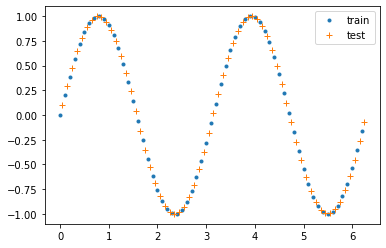

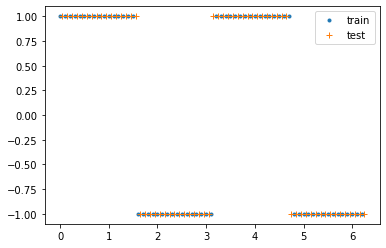

In [2]:
train_pts = np.arange(0,2*np.pi, 0.1)
test_pts = np.arange(0.05,2*np.pi, 0.1)

# Sine wave
train_sin = np.sin(2*train_pts)
test_sin = np.sin(2*test_pts)
plt.plot(train_pts, train_sin, '.', label='train')
plt.plot(test_pts, test_sin, '+', label='test')
plt.legend()
plt.show()

# Square function
train_sq = np.where(train_sin >= 0, 1, -1)
test_sq = np.sign(test_sin)
plt.plot(train_pts, train_sq, '.', label='train')
plt.plot(test_pts, test_sq, '+', label='test')
plt.legend()
plt.show()

## Create RBF network

In [3]:
class rbfn():
    def __init__(self, sigma=0.1, mu_mode='even', n=1):
        if mu_mode in ['even', 'cl']:
            self.__mu = np.arange(0,2*np.pi, 2*np.pi/n)
        elif mu_mode == 'rand':
            self.__mu = np.random.rand(1,n)
        self.__mu_mode = mu_mode
        self.__W = np.zeros(n)
        self.__sigma = sigma
        self.__n = n
        
    def __phi_batch(self, x):
        mutiled = np.tile(self.__mu, (len(np.array(x)), 1))
        xtiled = np.tile(x, (len(self.__mu),1)).T
        return np.exp(-(xtiled-mutiled)**2/(2*self.__sigma**2))
    
    def __phi(self, x):
        return np.exp(-(x-self.__mu)**2/(2*self.__sigma**2))
    
    def __cl_mu(self, X):
        return
    
    def fit(self, X, Y, mode='b', epochs=0, lr=0):
        if self.__mu_mode == 'cl':
            self.__cl_mu(X)
        elif self.__mu_mode == 'rand':
            self.__mu = self.__mu*X.max()
        
        if mode == 'b':
            phiphi = self.__phi_batch(X).T @ self.__phi_batch(X)
            self.__W = np.linalg.pinv(phiphi) @ self.__phi_batch(X).T @ Y
            
        elif mode == 's':
            for e in range(epochs):
                p = np.random.permutation(X.shape[0])
                X = X[p]
                Y = Y[p]
                for k in range(len(X)):
                    e = self.predict(X[k]) - Y[k]
                    self.__W -= lr*e*self.__phi(X[k])
                    
    
    def predict(self, X):
        try:
            return self.__phi_batch(X) @ self.__W
        except:
            return self.__phi(X) @ self.__W

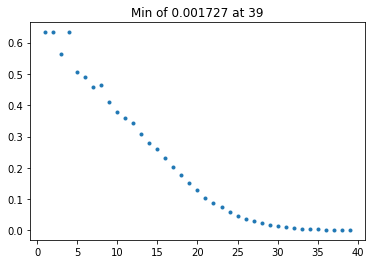

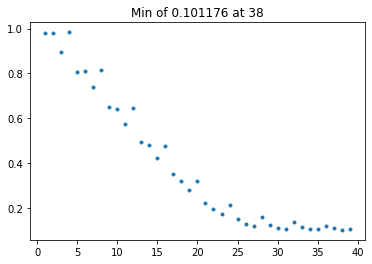

In [4]:
n_nodes = np.arange(1,40)
sq_resis = []
sin_resis = []
for n in n_nodes:
    # Sine func
    f = rbfn(n=n)
    f.fit(train_pts, train_sin)
    preds = f.predict(test_pts)
    residual = np.abs(test_sin-preds).mean()
    sin_resis.append(residual)
    
    # Square func
    f = rbfn(n=n)
    f.fit(train_pts, train_sq)
    preds = f.predict(test_pts)
    residual = np.abs(test_sq-preds).mean()
    sq_resis.append(residual)

plt.plot(n_nodes, sin_resis, '.')
plt.title('Min of %f at %d' % (min(sin_resis), n_nodes[np.argmin(sin_resis)]))
plt.show()

plt.plot(n_nodes, sq_resis, '.')
plt.title('Min of %f at %d' % (min(sq_resis), n_nodes[np.argmin(sq_resis)]))
plt.show()

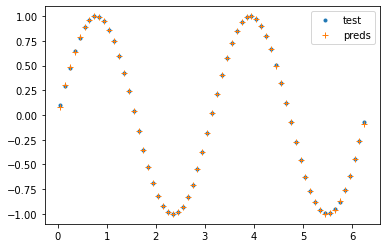

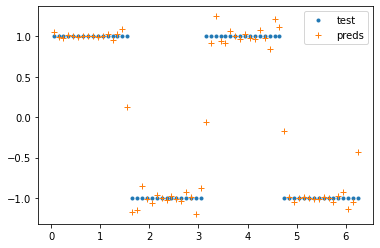

In [5]:
f = rbfn(n=39)
f.fit(train_pts, train_sin)
preds = f.predict(test_pts)
plt.plot(test_pts, test_sin, '.', label='test')
plt.plot(test_pts, preds, '+', label='preds')
plt.legend()
plt.show()

f = rbfn(n=38)
f.fit(train_pts, train_sq)
preds = f.predict(test_pts)
plt.plot(test_pts, test_sq, '.', label='test')
plt.plot(test_pts, preds, '+', label='preds')
plt.legend()
plt.show()

# 3.2 Regression with noise

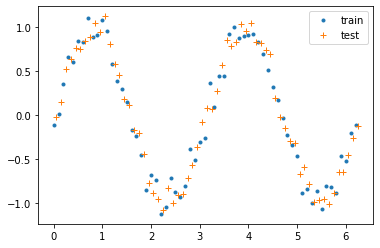

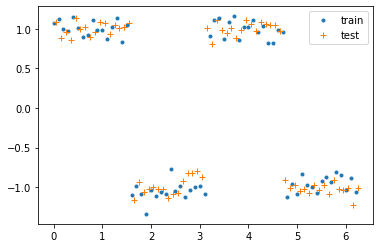

In [6]:
noisy_train_sin = train_sin + np.random.normal(0, 0.1, len(train_sin))
noisy_test_sin = test_sin + np.random.normal(0, 0.1, len(test_sin))
plt.plot(train_pts, noisy_train_sin, '.', label='train')
plt.plot(test_pts, noisy_test_sin, '+', label='test')
plt.legend()
plt.show()

noisy_train_sq = train_sq + np.random.normal(0, 0.1, len(train_sq))
noisy_test_sq = test_sq + np.random.normal(0, 0.1, len(test_sq))
plt.plot(train_pts, noisy_train_sq, '.', label='train')
plt.plot(test_pts, noisy_test_sq, '+', label='test')
plt.legend()
plt.show()

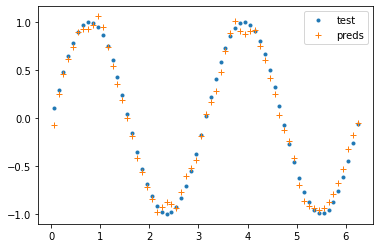

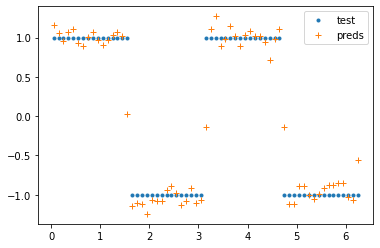

In [7]:
f = rbfn(n=32)
f.fit(train_pts, noisy_train_sin, mode='s', lr=0.1, epochs=100)
preds = f.predict(test_pts)
plt.plot(test_pts, test_sin, '.', label='test')
plt.plot(test_pts, preds, '+', label='preds')
plt.legend()
plt.show()

f = rbfn(n=46)
f.fit(train_pts, noisy_train_sq, mode='s', lr=0.1, epochs=100)
preds = f.predict(test_pts)
plt.plot(test_pts, test_sq, '.', label='test')
plt.plot(test_pts, preds, '+', label='preds')
plt.legend()
plt.show()

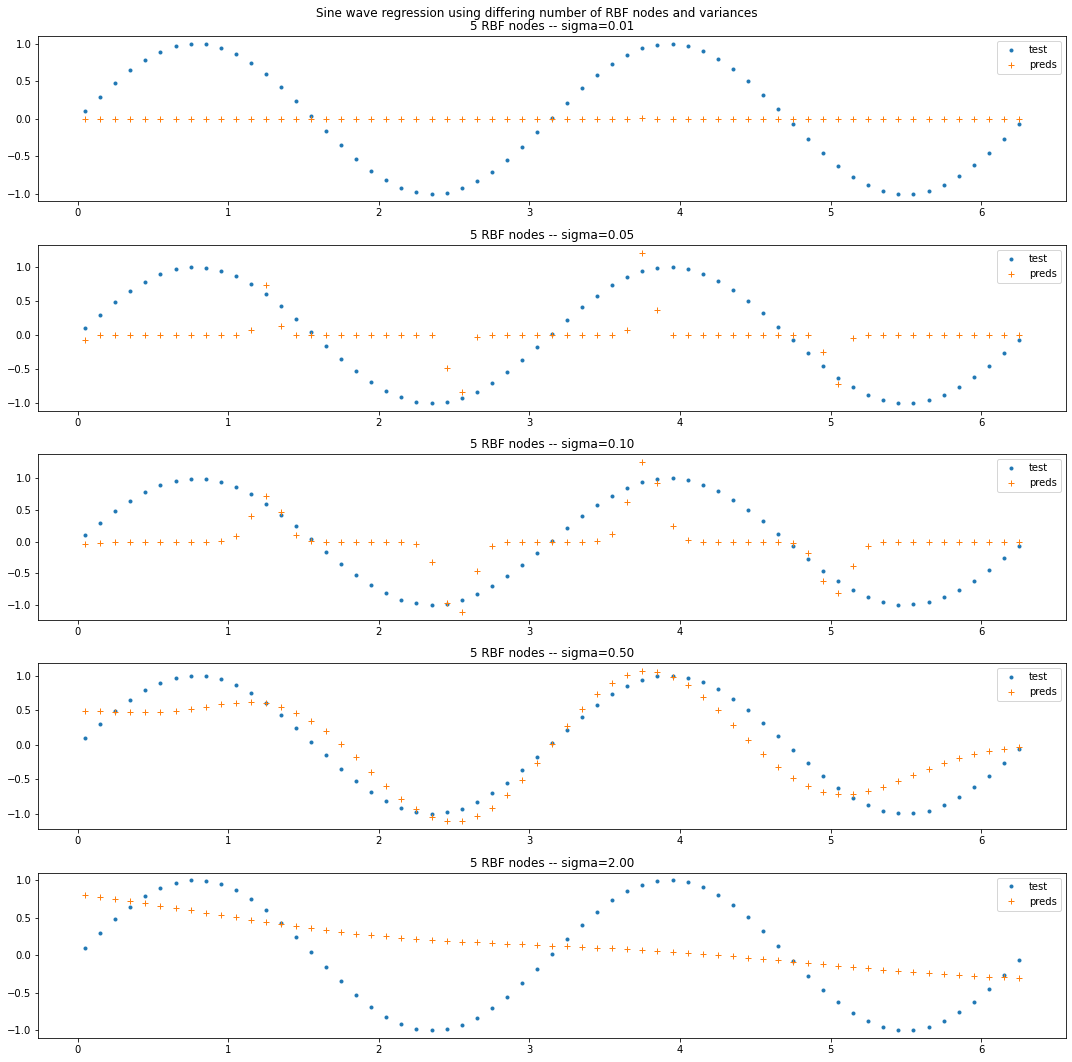

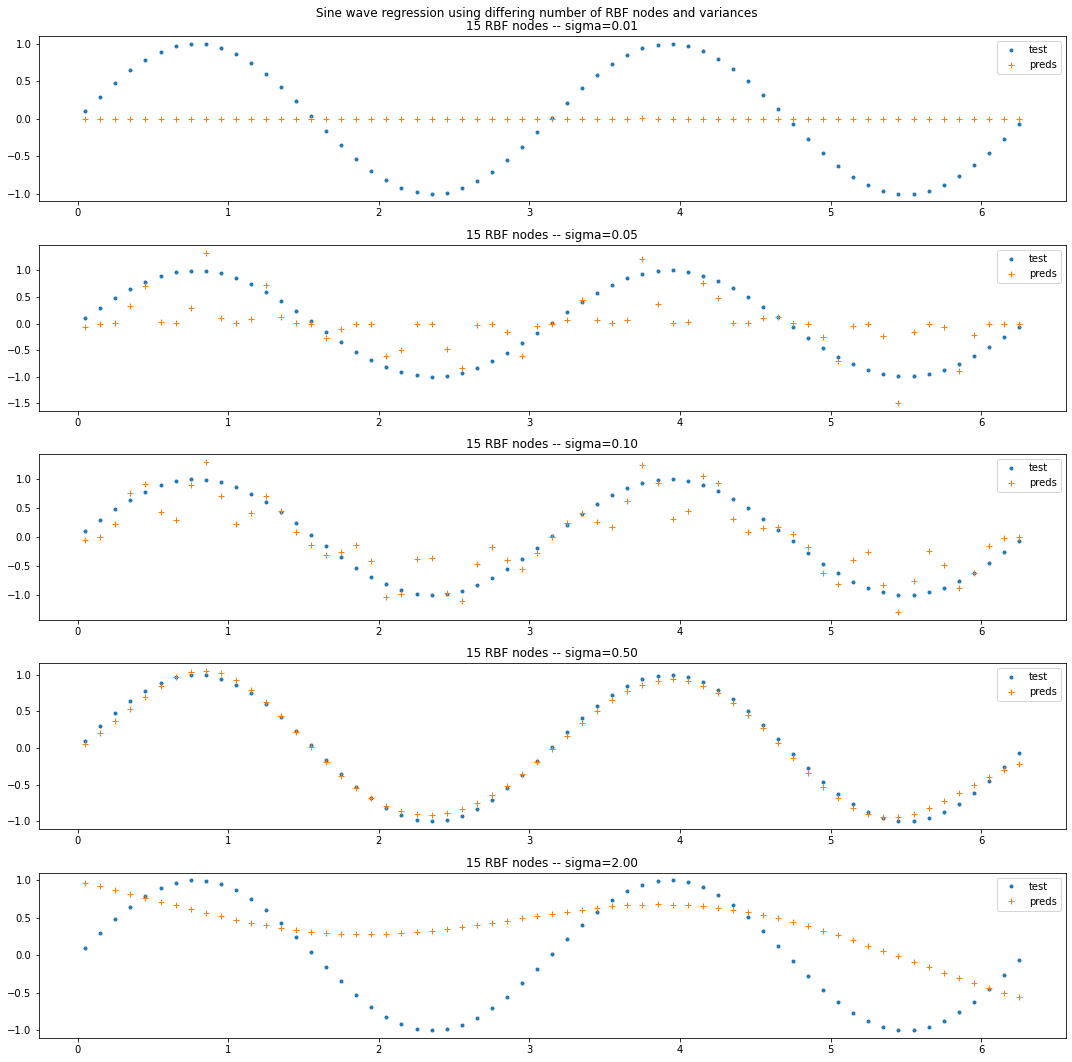

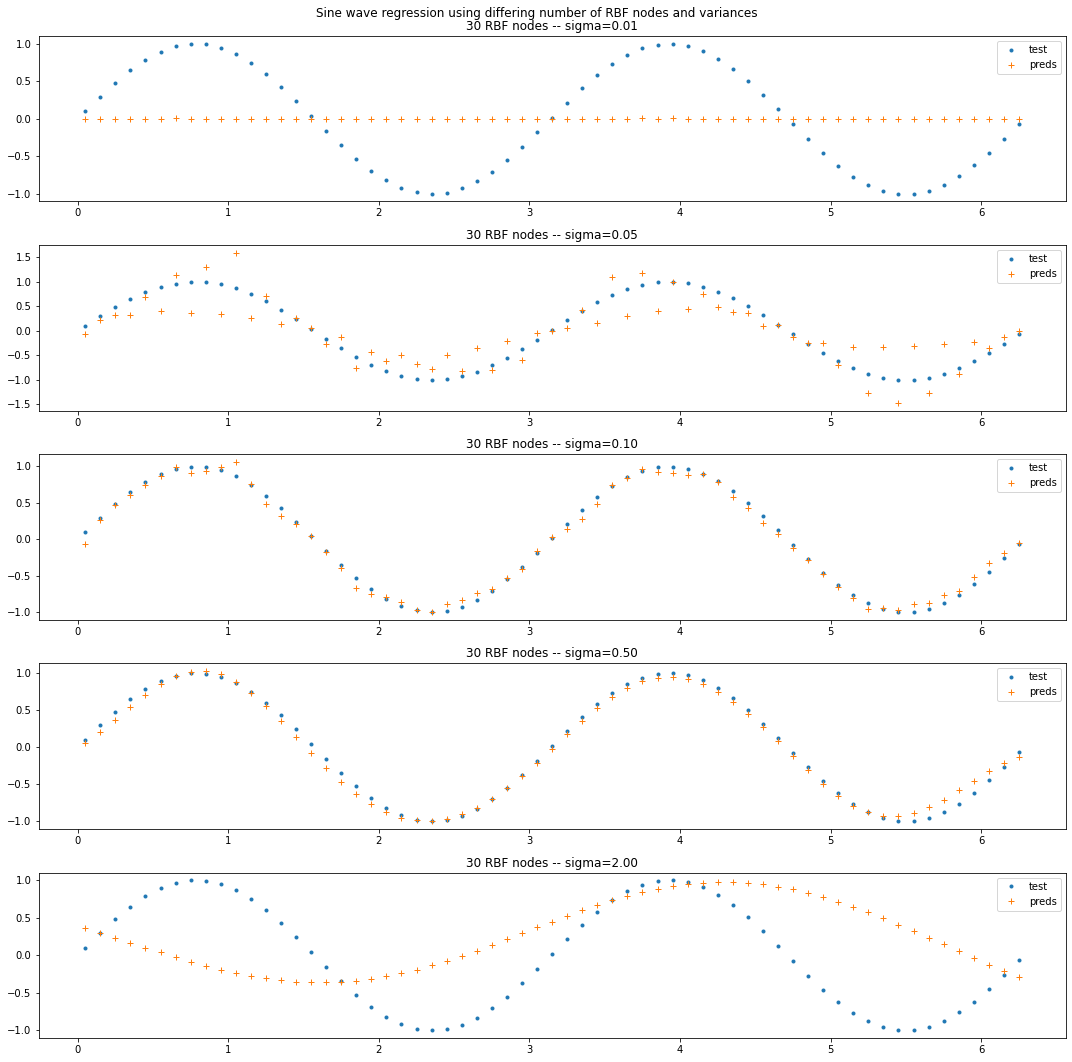

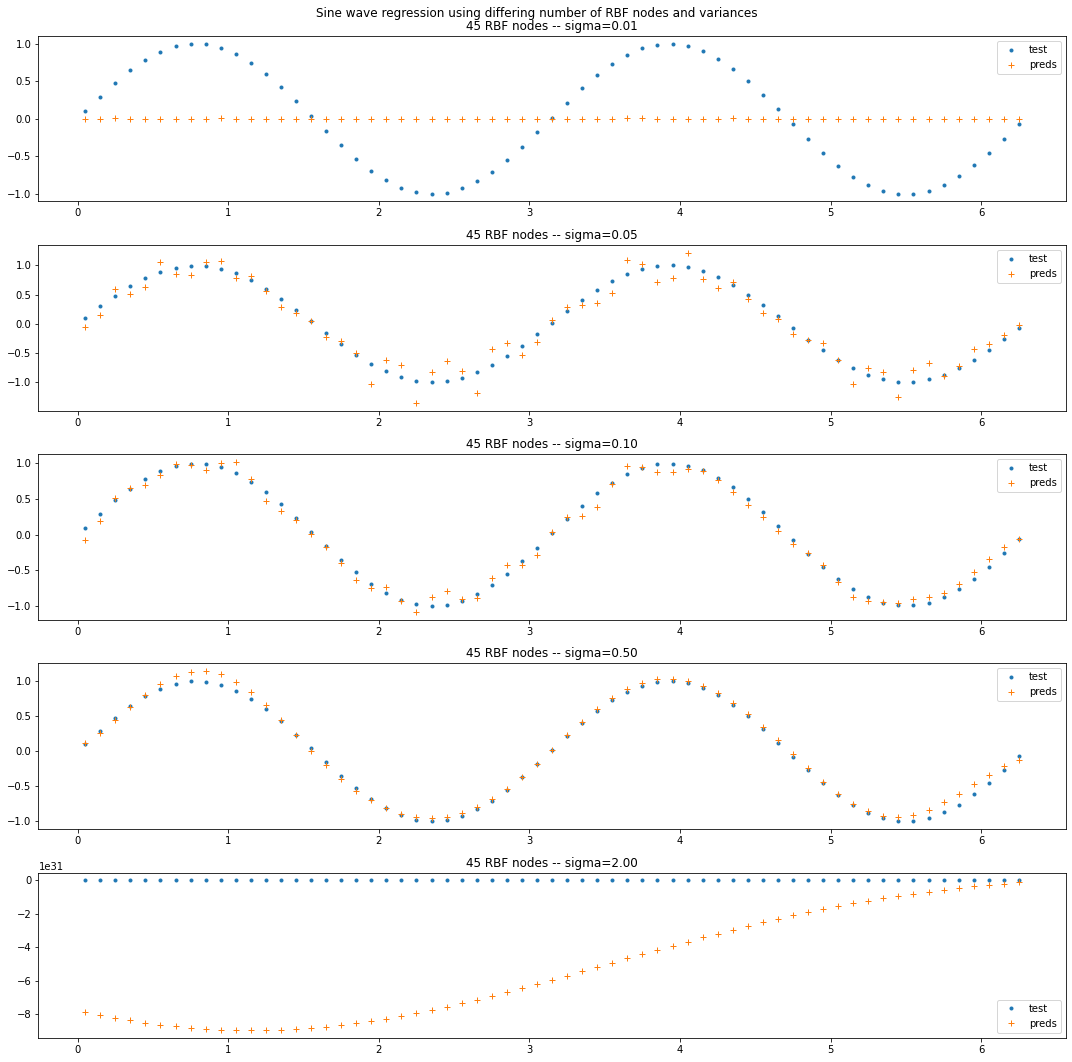

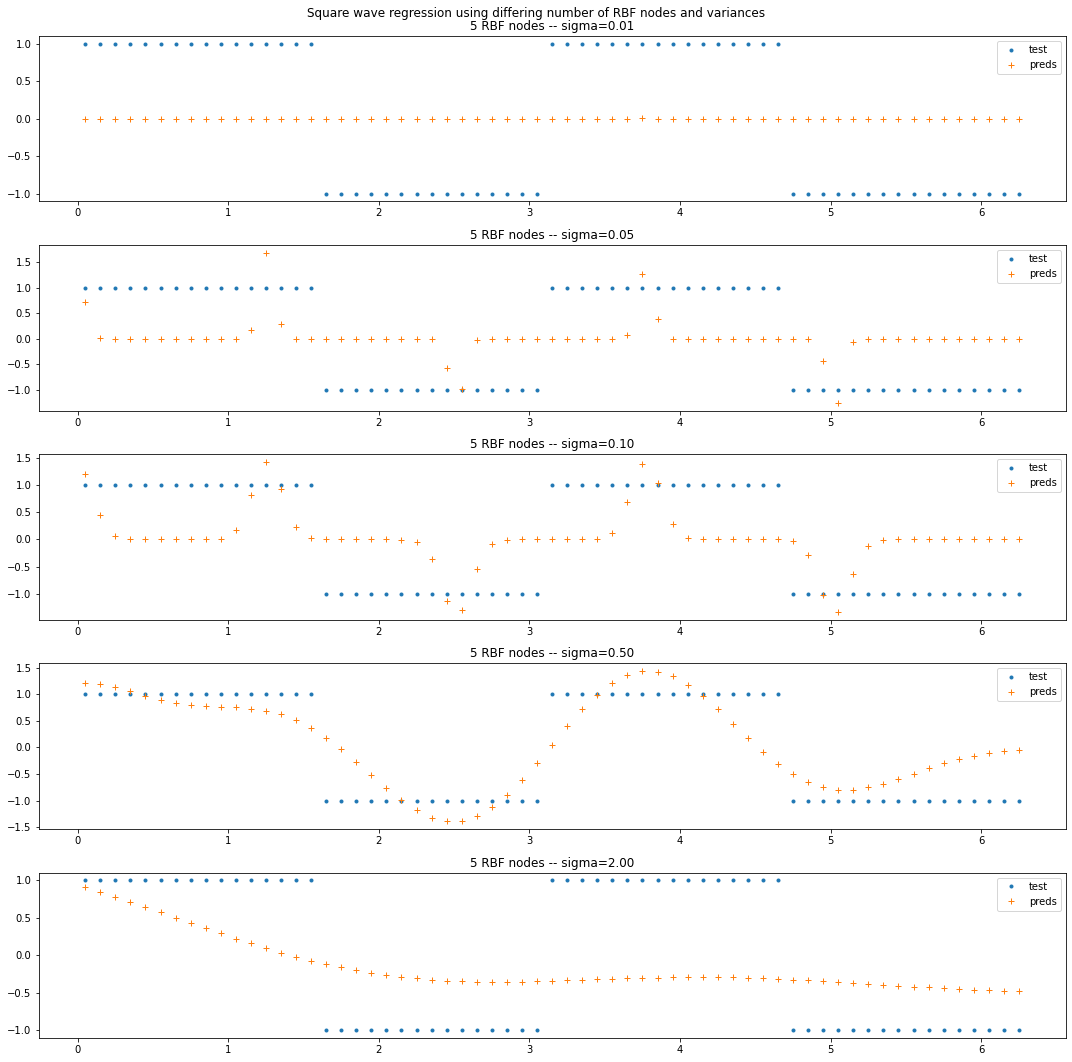

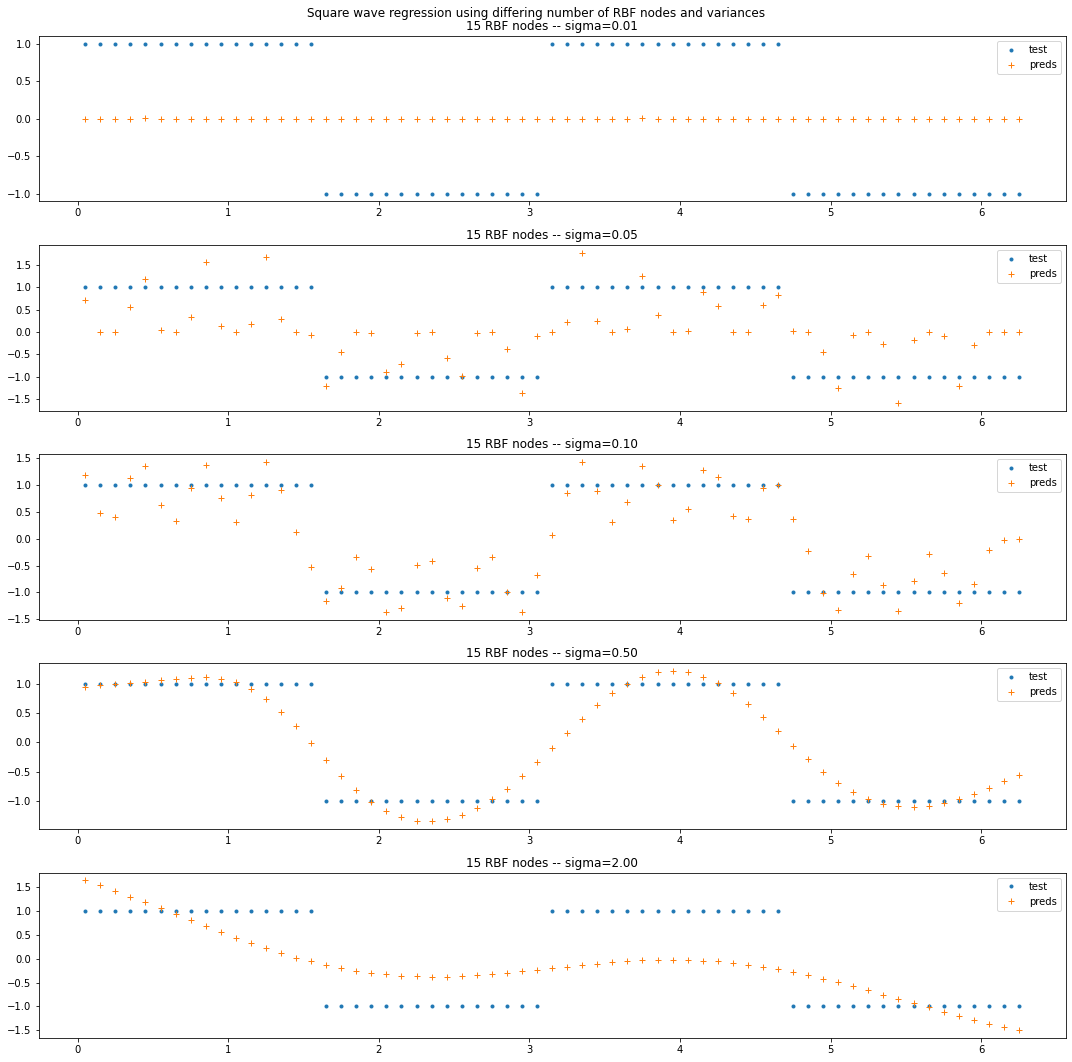

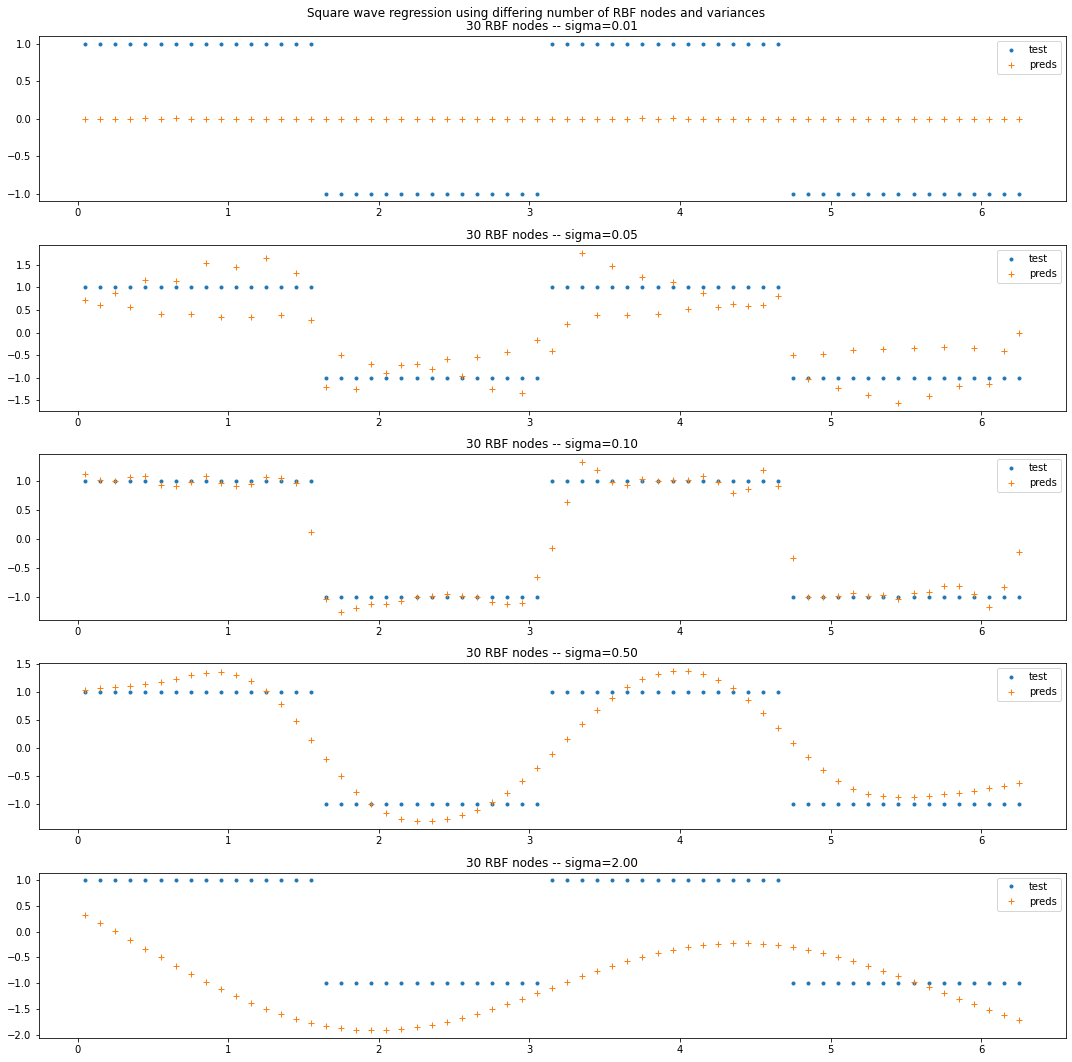

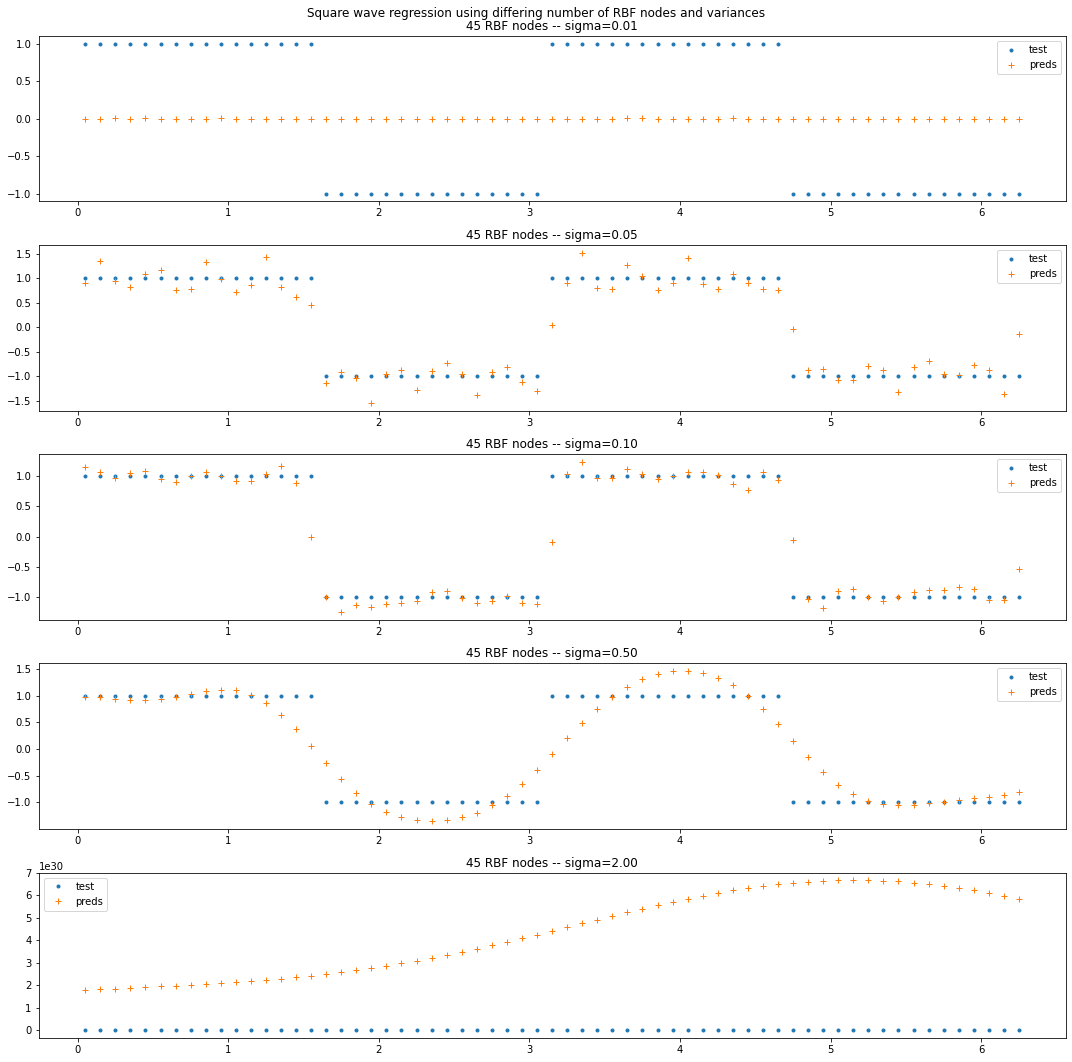

In [8]:
sigs = [0.01,0.05,0.1,0.5,2]
for n in [5,15,30,45]:
    fig, axs = plt.subplots(5,1, figsize=(15,15))
    fig.suptitle('Sine wave regression using differing number of RBF nodes and variances')
    for i in range(len(sigs)):
        f = rbfn(n=n,sigma=sigs[i])
        f.fit(train_pts, noisy_train_sin, mode='s', epochs=40, lr=0.1)
        preds = f.predict(test_pts)
        axs[i].plot(test_pts, test_sin, '.', label='test')
        axs[i].plot(test_pts, preds, '+', label='preds')
        axs[i].legend()
        axs[i].set_title('%d RBF nodes -- sigma=%.2f' % (n, sigs[i]))
    plt.tight_layout()
    plt.show()
    
for n in [5,15,30,45]:
    fig, axs = plt.subplots(5,1, figsize=(15,15))
    fig.suptitle('Square wave regression using differing number of RBF nodes and variances')
    for i in range(len(sigs)):
        f = rbfn(n=n,sigma=sigs[i])
        f.fit(train_pts, noisy_train_sq, mode='s', epochs=40, lr=0.1)
        preds = f.predict(test_pts)
        axs[i].plot(test_pts, test_sq, '.', label='test')
        axs[i].plot(test_pts, preds, '+', label='preds')
        axs[i].legend()
        axs[i].set_title('%d RBF nodes -- sigma=%.2f' % (n, sigs[i]))
    plt.tight_layout()
    plt.show()

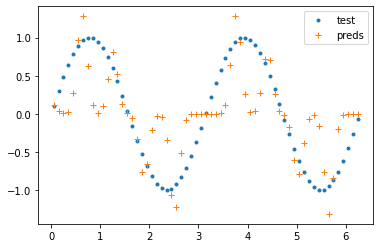

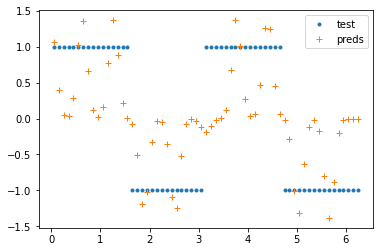

In [9]:
f = rbfn(mu_mode='cl', n=10)
f.fit(train_pts, train_sin, mode='s', epochs=100, lr=0.1)
preds = f.predict(test_pts)
plt.plot(test_pts, test_sin, '.', label='test')
plt.plot(test_pts, preds, '+', label='preds')
plt.legend()
plt.show()

f = rbfn(mu_mode='cl', n=10)
f.fit(train_pts, train_sq, mode='s', epochs=100, lr=0.5)
preds = f.predict(test_pts)
plt.plot(test_pts, test_sq, '.', label='test')
plt.plot(test_pts, preds, '+', label='preds')
plt.legend()
plt.show()